In [1]:
#librariile de care avem nevoie
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd
import scipy as sy
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [2]:
os.chdir('D:\LP bancnote')
#directorul unde lucram

In [3]:
#citirea setului de date 

banknotes=pd.read_csv('D:\LP bancnote\data_banknote_authentication.txt',names=['variance','skewness','curtosis','entropy','class'], header=0)
#convertirea datelor in matrice

X = banknotes[['variance','skewness','curtosis','entropy']].to_numpy()
y = banknotes[['class']].to_numpy()[:,0] 

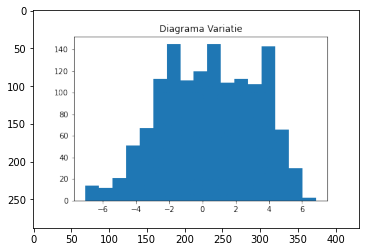

In [4]:
#Variance
plt.hist(X[:,0],bins='auto')
plt.title('Diagrama Variatie')
plt.savefig('D:\LP bancnote/variatie.png')
plt.close()
img = mpimg.imread('variatie.png')
imgplot = plt.imshow(img)
plt.show()

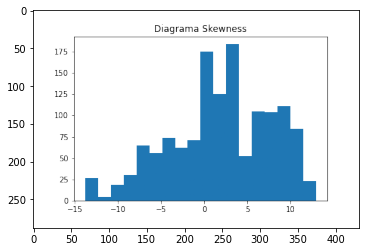

In [5]:
#Skewness
plt.hist(X[:,1],bins='auto')
plt.title('Diagrama Skewness')
plt.savefig('D:\LP bancnote/skewness.png')
plt.close()
img = mpimg.imread('skewness.png')
imgplot = plt.imshow(img)
plt.show()

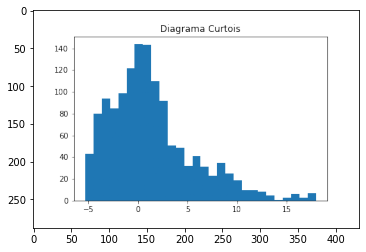

In [6]:
#Curtois
plt.hist(X[:,2],bins='auto')
plt.title('Diagrama Curtois')
plt.savefig('D:\LP bancnote/Curtois.png')
plt.close()
img = mpimg.imread('Curtois.png')
imgplot = plt.imshow(img)
plt.show()

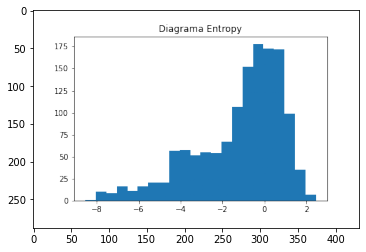

In [7]:
#Entropy
plt.hist(X[:,3],bins='auto')
plt.title('Diagrama Entropy')
plt.savefig('D:\LP bancnote/ent.png')
plt.close()
img = mpimg.imread('ent.png')
imgplot = plt.imshow(img)
plt.show()

In [8]:
#Creare antrenament si seturi de date
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#Decision Tree
decisionTree=tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
tree_predictions=decisionTree.predict(X_test)
score_tree=decisionTree.score(X_test, y_test)
print(score_tree)

0.9927272727272727


In [10]:
#
# Setul de date
#
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc. transform(X_test)


In [11]:
#SVC model
svc=SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [12]:
# Predictie
y_pred= svc.predict(X_test)

In [13]:
# Calculare matrice de confuzie
conf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)


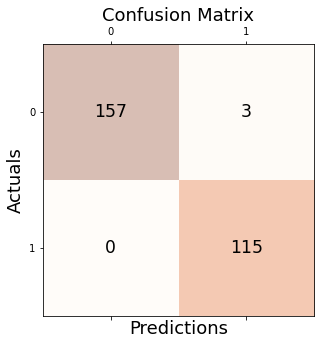

In [14]:
# Afisare matrice 
fig,ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i,j], va='center',ha='center', size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %3f' % recall_score(y_test,y_pred))
print('Accuracy: %3f'% accuracy_score(y_test,y_pred))
print('F1 Score: %3f'% f1_score(y_test,y_pred))

Precision: 0.975
Recall: 1.000000
Accuracy: 0.989091
F1 Score: 0.987124
